<a href="https://colab.research.google.com/github/Yeruva001/Joseph_INFO5731_Fall2021/blob/main/In_class_exercise_05_11172022_Akhil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 11/17/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [98]:
# Write your code here

import pandas as pd
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold

Training_dataframe = pd.read_csv(r'/content/stsa-train.txt',sep = 'delimiter=',header= None,names=['abstract'])
Testing_dataframe = pd.read_csv(r'/content/stsa-test.txt',sep = 'delimiter=',header= None,names=['abstract'])

Training_dataframe[['Sentiment','abstract']] = Training_dataframe["abstract"].str.split(" ", 1, expand=True)
Testing_dataframe[['Sentiment','astract']] = Testing_dataframe["abstract"].str.split(" ", 1, expand=True)



/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [99]:
print(Training_dataframe.head())

                                            abstract Sentiment
0  a stirring , funny and finally transporting re...         1
1  apparently reassembled from the cutting-room f...         0
2  they presume their audience wo n't sit still f...         0
3  this is a visually stunning rumination on love...         1
4  jonathan parker 's bartleby should have been t...         1


In [100]:
print(Testing_dataframe.head())

                                            abstract Sentiment  \
0   0 no movement , no yuks , not much of anything .         0   
1  0 a gob of drivel so sickly sweet , even the e...         0   
2  0 gangs of new york is an unapologetic mess , ...         0   
3  0 we never really feel involved with the story...         0   
4          1 this is one of polanski 's best films .         1   

                                             astract  
0     no movement , no yuks , not much of anything .  
1  a gob of drivel so sickly sweet , even the eag...  
2  gangs of new york is an unapologetic mess , wh...  
3  we never really feel involved with the story ,...  
4            this is one of polanski 's best films .  


In [101]:
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
word_lem= WordNetLemmatizer()

def cleaneddata(train_data):
  train_data ="".join([words.lower() for words in train_data if words not in string.punctuation])
  train_data = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", train_data)
  phrases = re.split('\W+',train_data)
  train_data = [word_lem.lemmatize(words) for words in phrases if words not in stop_words]
  return train_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(analyzer = cleaneddata)
tf_idf = tf.fit_transform(Training_dataframe['abstract'])
tf_idf.shape

(6920, 13343)

In [103]:
tf_idf_dataframe = pd.DataFrame(tf_idf.toarray())
tf_idf_dataframe.columns=tf.get_feature_names()
tf_idf_dataframe.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,100minute,103minute,10course,10th,10thgrade,10year,10yearold,112minute,12,...,ziyi,zoe,zombie,zombieland,zone,zoning,zoom,zwick,zzzzzzzzz,élan
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.048154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.029784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.049596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.048782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
Test_tf_idf = tf.transform(Testing_dataframe['abstract'])
print(Test_tf_idf.shape)

(1821, 13343)


In [105]:
MNB_algo = MultinomialNB()
SVM_algo = LinearSVC()
KNN_algo = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
DT_algo = DecisionTreeClassifier()
RF_algo = RandomForestClassifier()
XGB_algo = XGBClassifier()

In [106]:
train1, test1, train2, test2 = train_test_split(tf_idf, Training_dataframe['Sentiment'].values,
                                                test_size=0.2, random_state=42)

In [107]:
MNB_fit = MNB_algo.fit(train1,train2)

In [108]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
final_MNB = MNB_fit.predict(test1)
print('Accuracy_result %s' % accuracy_score(final_MNB,test2))
print(classification_report(test2,final_MNB))

Accuracy_result 0.7955202312138728
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384



In [109]:
from sklearn.model_selection import cross_val_score
res = cross_val_score(MNB_algo, test1, test2, cv=10)
print("MNB_given",res.mean())

MNB_given 0.7247054530288813


In [110]:
SVM_fit = SVM_algo.fit(train1,train2)
final_SVM = SVM_fit.predict(test1)
print('Accuracy_result %s' % accuracy_score(final_SVM,test2))
print(classification_report(test2,final_SVM))

Accuracy_result 0.791907514450867
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [111]:
DT_fit = DT_algo.fit(train1,train2)
FinalDT = DT_fit.predict(test1)
print('Accuracy_result %s' % accuracy_score(FinalDT,test2))
print(classification_report(test2,FinalDT))

Accuracy_result 0.6625722543352601
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       671
           1       0.66      0.71      0.69       713

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.66      1384
weighted avg       0.66      0.66      0.66      1384



In [112]:
from sklearn.model_selection import cross_val_score
res = cross_val_score(SVM_algo, test1, test2, cv=10)
print("SVM_given",res.mean())

SVM_given 0.7348034615785632


In [66]:
KNN_fit = KNN_algo.fit(train1,train2)
final_KNN = KNN_fit.predict(test1)
print('Accuracy_result %s' % accuracy_score(final_KNN,test2))
print(classification_report(test2,final_KNN))

Accuracy_result 0.740606936416185
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384



In [67]:
from sklearn.model_selection import cross_val_score
res = cross_val_score(KNN_algo, test1, test2, cv=10)
print("KNN_given",res.mean())

KNN_given 0.6675737670732979


In [68]:
XGB_fit = XGB_algo.fit(train1,train2)
final_XGB = XGB_fit.predict(test1)
res = cross_val_score(XGB_algo, test1, test2, cv=10)
print('Accuracy_result %s' % accuracy_score(final_XGB,test2))
print(classification_report(test2,final_XGB))
print("XGB_given",res.mean())

Accuracy_result 0.6488439306358381
              precision    recall  f1-score   support

           0       0.76      0.41      0.53       671
           1       0.61      0.88      0.72       713

    accuracy                           0.65      1384
   macro avg       0.68      0.64      0.62      1384
weighted avg       0.68      0.65      0.63      1384

XGB_given 0.6198884370764259


In [69]:
res = cross_val_score(DT, test1, test2, cv=10)
print("DT_given",res.mean())

DT_given 0.601824627254718


In [70]:
RF_fit = RF_algo.fit(train1,train2)
final_RF = RF_fit.predict(test1)
res = cross_val_score(RF_algo, test1, test2, cv=10)
print('Acc_result %s' % accuracy_score(final_RF,test2))
print(classification_report(test2,final_RF))
print("RF_given",res.mean())

Acc_result 0.7398843930635838
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       671
           1       0.72      0.81      0.76       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384

RF_given 0.6747784381190699


In [71]:
Testing_MNB_algo = MNB_fit.predict(Test_tf_idf)
print('Accuracy_result %s' % accuracy_score(Testing_MNB_algo,Testing_dataframe['Sentiment']))
print(classification_report(Testing_MNB_algo,Testing_dataframe['Sentiment']))


Accuracy_result 0.7940691927512356
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       729
           1       0.89      0.74      0.81      1092

    accuracy                           0.79      1821
   macro avg       0.79      0.81      0.79      1821
weighted avg       0.81      0.79      0.80      1821



In [72]:
Testing_SVM_algo = SVM_fit.predict(Test_tf_idf)
print('Accuracy_result %s' % accuracy_score(Testing_SVM_algo,Testing_dataframe['Sentiment']))
print(classification_report(Testing_SVM_algo,Testing_dataframe['Sentiment']))

Accuracy_result 0.7869302580999451
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       838
           1       0.83      0.77      0.79       983

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.79      1821
weighted avg       0.79      0.79      0.79      1821



(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [73]:
import pandas as pd
import gensim
Df=pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from textblob import Word
nltk.download('wordnet')
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
Df = Df[Df['Reviews'].notnull()]
dataframe = Df
stop = stopwords.words('english')
Df['puncless'] = Df['Reviews'].str.replace('[^\w\s].#','')
Df['mstopwords'] =Df['puncless'].apply(lambda i: " ".join(i for i in i.split() if i not in stop))
Df['numbers']=Df['mstopwords'].str.replace('[0-9]','')
Df['lowest'] =Df['numbers'].apply(lambda i: " ".join(i.lower() for i in i.split()))

Df['stemming']=Df['lowest'].apply(lambda i: " ".join([stemmer.stem(word) for word in i.split()]))
Df['freshdata'] = Df['stemming'].apply(lambda i: " ".join([Word(word).lemmatize() for word in i.split()]))





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: The default value of regex will change from True to False in a future version.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: The default value of regex will change from True to False in a future version.


In [74]:
print(Df['freshdata'].head())

0    i feel lucki found use (phone u & use hard all...
1    nice phone, nice grade pantach revue. veri cle...
2                                            veri plea
3      it work good goe slow sometim good phone i love
4    great phone replac lost phone. the thing volum...
Name: freshdata, dtype: object


In [76]:
Dataframe1=(dataframe.sample(n=4000)).reset_index()

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vec = TfidfVectorizer()
tfidf_res = tf_idf_vec.fit_transform(Dataframe1['freshdata'].values)
print(tfidf_res.shape)

(4000, 7296)


In [78]:
from sklearn.cluster import KMeans
Mtf_idf_kmean = KMeans(n_clusters = 5,random_state=99)
Mtf_idf_kmean.fit(tfidf_res)

KMeans(n_clusters=5, random_state=99)

In [79]:
tf_idf_labelling = Mtf_idf_kmean.labels_
tf_idf_clustering=Mtf_idf_kmean.cluster_centers_

In [81]:
vars = tf_idf_vec.get_feature_names()
vars[1:5]
Dataframe1['tf_idf cluster labelling'] = tf_idf_labelling
Dataframe1.head(5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,index,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,puncless,mstopwords,numbers,lowest,stemming,freshdata,tf_idf cluster labelling
0,249804,Motorola KRZR K1 Unlocked Phone with 2 MP Came...,Motorola,82.99,4,Phone showed up a little ahead of time. Worked...,1.0,Phone showed up a little ahead of time. Worked...,Phone showed little ahead time. Worked great e...,Phone showed little ahead time. Worked great e...,phone showed little ahead time. worked great e...,phone show littl ahead time. work great except...,phone show littl ahead time. work great except...,2
1,10719,Apple iPhone 4 A1332 32GB White (GSM Unlocked),Apple,138.97,5,I have been using the cell phone for 1 month a...,0.0,I have been using the cell phone for 1 month a...,"I using cell phone 1 month working good, would...","I using cell phone month working good, would ...","i using cell phone month working good, would d...","i use cell phone month work good, would define...","i use cell phone month work good, would define...",2
2,133723,BLU S480U Unlocked Studio 7.0 II Smartphone wi...,BLU,NaN,5,All I have to say is just WOW!!! Everything I ...,NaN,All I have to say is just WOW!!! Everything I ...,All I say WOW!!! Everything I wanted one. Ship...,All I say WOW!!! Everything I wanted one. Ship...,all i say wow!!! everything i wanted one. ship...,all i say wow!!! everyth i want one. ship pret...,all i say wow!!! everyth i want one. ship pret...,2
3,394744,"Sony Xperia Z3 Compact D5803 16GB 4G LTE 4.6"" ...",NaN,244.00,5,Love this phone!,0.0,Love this phone!,Love phone!,Love phone!,love phone!,love phone!,love phone!,4
4,353611,Samsung Galaxy S5 Mini G800H Unlocked Cellphon...,Samsung,350.00,5,"Excelent, thanks.",0.0,"Excelent, thanks.","Excelent, thanks.","Excelent, thanks.","excelent, thanks.","excelent, thanks.","excelent, thanks.",0


In [82]:

Dataframe1.groupby(['tf_idf cluster labelling'])['freshdata'].count()

tf_idf cluster labelling
0     209
1     240
2    3174
3     196
4     181
Name: freshdata, dtype: int64

In [84]:
centers = Mtf_idf_kmean.cluster_centers_.argsort()[:, ::-1]
for i in range(1,5):
    print("Cluster No %d:" % i, end='')
    for index in centers[i, :7]:
        print(' %s' % vars[index], end='')
        print()

Cluster No 1: great
 phone
 work
 product
 price
 it
 thank
Cluster No 2: phone
 it
 work
 the
 good
 use
 like
Cluster No 3: good
 veri
 phone
 product
 price
 thank
 it
Cluster No 4: love
 phone
 it
 great
 new
 daughter
 work


In [87]:
from sklearn.cluster import DBSCAN
import numpy as npy
import matplotlib.pyplot as plt
import gensim
i=0
list_vals=[]
for j in Dataframe1['freshdata'].values:
    list_vals.append(j.split())
word2vec = gensim.models.Word2Vec(list_vals,size=100, workers=4)
import numpy as npy
vectrs = [];
for j in list_vals:
    vectr1 = npy.zeros(100)
    c = 0;
    for w in j:
        try:
            vectr2 = word2vec.wv[w]
            vectr1 += vectr2
            c += 1
        except:
            pass
    vectr1 /= c
    vectrs.append(vectr1)
vectrs = npy.array(vectrs)
vectrs = npy.nan_to_num(vectrs)
vectrs.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


(4000, 100)

In [91]:
points = 2 * 100
def lower_bound(num, reach): 
    low, up = 0, len(num) - 1
    while low <= up: 
        count = int(low + (up - low) / 2)
        if num[count] >= reach:
            up = count - 1
        else:
            low = count + 1
    return low

def computing (i, text): 
    dist_array = []
    for data in text:
        dist = npy.sum((i - data) **2 ) 
        if(len(dist_array) == 200 and dist_array[199] > dist): 
            low = int(lower_bound(dist_array, dist))
            if low < 200 and low >= 0 and dist_array[low] > dist:
                dist_array[low] = dist
        else:
            dist_array.append(dist)
            dist_array.sort()
    
    return dist_array[199]

In [92]:
neighbours = []
for i in vectrs[:500]:
    neighbours.append(computing(i, vectrs[:500]) )
neighbours.sort()

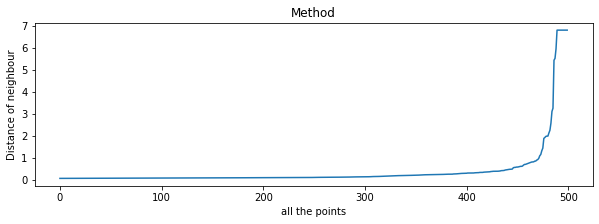

In [93]:
plt.figure(figsize=(10,3))
plt.title("Method")
plt.plot([i for i in range(len(neighbours))], neighbours)
plt.xlabel("all the points")
plt.ylabel("Distance of neighbour")
plt.show()

In [94]:
dsgn = DBSCAN(eps = 8, min_samples = points, n_jobs=-2)
dsgn.fit(vectrs)
Dataframe1['WMword design'] = dsgn.labels_
Dataframe1.head(4)

,index,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,puncless,mstopwords,numbers,lowest,stemming,freshdata,tf_idf cluster labelling,WMword design
0,249804,Motorola KRZR K1 Unlocked Phone with 2 MP Came...,Motorola,82.99,4,Phone showed up a little ahead of time. Worked...,1.0,Phone showed up a little ahead of time. Worked...,Phone showed little ahead time. Worked great e...,Phone showed little ahead time. Worked great e...,phone showed little ahead time. worked great e...,phone show littl ahead time. work great except...,phone show littl ahead time. work great except...,2,0
1,10719,Apple iPhone 4 A1332 32GB White (GSM Unlocked),Apple,138.97,5,I have been using the cell phone for 1 month a...,0.0,I have been using the cell phone for 1 month a...,"I using cell phone 1 month working good, would...","I using cell phone month working good, would ...","i using cell phone month working good, would d...","i use cell phone month work good, would define...","i use cell phone month work good, would define...",2,0
2,133723,BLU S480U Unlocked Studio 7.0 II Smartphone wi...,BLU,NaN,5,All I have to say is just WOW!!! Everything I ...,NaN,All I have to say is just WOW!!! Everything I ...,All I say WOW!!! Everything I wanted one. Ship...,All I say WOW!!! Everything I wanted one. Ship...,all i say wow!!! everything i wanted one. ship...,all i say wow!!! everyth i want one. ship pret...,all i say wow!!! everyth i want one. ship pret...,2,0
3,394744,"Sony Xperia Z3 Compact D5803 16GB 4G LTE 4.6"" ...",NaN,244.00,5,Love this phone!,0.0,Love this phone!,Love phone!,Love phone!,love phone!,love phone!,love phone!,4,0


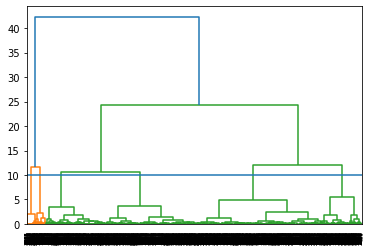

In [95]:
import scipy
from scipy.cluster import hierarchy
Dendogram = hierarchy.dendrogram(hierarchy.linkage(vectrs,method='ward'))
plt.axhline(y=10)

In [96]:
from sklearn.cluster import AgglomerativeClustering

clust_anal = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
Agg = clust_anal.fit_predict(vectrs)
Dataframe1['WMword cluster'] = clust_anal.labels_
Dataframe1.head(6)
Dataframe1.groupby(['WMword cluster'])['freshdata'].count()

WMword cluster
0    1518
1    1062
2     706
3     147
4     104
5     129
6     334
Name: freshdata, dtype: int64

In [97]:
for i in range(6):
    print("sentence", i) #reviews assigned to cluster
    print(Dataframe1.iloc[Dataframe1.groupby(['WMword cluster']).groups[i][0]]['freshdata'])
    print(Dataframe1.iloc[Dataframe1.groupby(['WMword cluster']).groups[i][1]]['freshdata'])


sentence 0
phone show littl ahead time. work great except send receiv pictures. i went at&t store sinc unlock much. i call at&t cust. servic spent min luck. he said server phone connect canadian mayb motorola could help. i went motorola onlin download fix. the onlin call phone, i answer fixed. the phone work excellent, look slick i glad i bought
i use cell phone month work good, would definet recomend , need know kind appl cell phone doesnt work sprint, verizon metropc t mobil at & t work good.
sentence 1
both sim card connect well network updat data set later one network reboots.
great phone. it' great bang buck deal. i'v impress speed phone far. everi app i'v use run without issu far.
sentence 2
all i say wow!!! everyth i want one. ship pretti fast :-)
i realli love thi phone so much.....
sentence 3
excelent la compra de est equipo muy bueno lo recomiendo para futura compra lego tal cual como se esperaba
mont later doesnt work
sentence 4
excelent, thanks.
excellent!
sentence 5
muy bu

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In general clustering means grouping of similar objects together or also differentiating the dissimilar object.Here K means clustering is the process of partitioning the data based on the number of clusters.Hierarchial clustering produces the set of clustered which are organised in the hierarchy.It uses similarity or distance matrix to form the clusters where as K means uses the K value to form the number of clusters.It does not need to assume the number of clusters as like K means.In Dense based scan forms the clusters based on the density of the objects.In this the clusters will be formed based on the given minimum number of points.This clustering algorithm also need not to assume the number of clusters.